# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2j1ynkby because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=5+9)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3004 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=5)
gm.sample()



Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2952 seconds.


## Summarize Model Output

In [6]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)

In [7]:
result.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-08,1.081203,1.079021,0.996675,1.152768,2573.778149,2344.441586,2032.993377,3489,44400
2020-09-09,1.077063,1.073957,0.992310,1.147393,2616.901323,2388.986854,2291.194304,3995,45110
2020-09-10,1.069530,1.066743,0.989315,1.143875,2657.699730,2434.763848,2272.016378,4161,47381
2020-09-11,1.061063,1.056551,0.971507,1.130410,2696.573458,2481.618101,2406.462228,3980,42788
2020-09-12,1.051322,1.047639,0.962651,1.123057,2733.002050,2529.339865,2361.805604,2719,29784
2020-09-13,1.039883,1.036848,0.952369,1.109779,2765.814388,2577.728140,2425.528232,3176,33876
2020-09-14,1.032196,1.029913,0.948189,1.114232,2794.113849,2626.608809,2685.958130,4805,46282
2020-09-15,1.026066,1.025927,0.946590,1.122106,2817.140515,2675.742486,2545.454510,5540,56307
2020-09-16,1.017692,1.014121,0.933658,1.104988,2835.413222,2724.805655,2238.461735,4582,52957


In [8]:
resultsev.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-07,1.117696,1.111242,1.009843,1.208761,68.646947,58.251791,54.0,54.0,10000
2020-09-08,1.112215,1.104166,1.003871,1.205986,70.241032,59.955309,60.0,60.0,10000
2020-09-09,1.107660,1.101679,0.991484,1.203766,71.811684,61.770895,78.0,78.0,10000
2020-09-10,1.102199,1.099927,0.975128,1.199511,73.359466,63.696005,68.0,68.0,10000
2020-09-11,1.101458,1.098310,0.965732,1.201114,74.880201,65.727246,45.0,45.0,10000
2020-09-12,1.101351,1.099340,0.979064,1.235408,76.373247,67.860507,61.0,61.0,10000
2020-09-13,1.099239,1.097759,0.951977,1.226308,77.868201,70.091298,65.0,65.0,10000
2020-09-14,1.097115,1.095493,0.946857,1.237513,79.403625,72.414498,75.0,75.0,10000
2020-09-15,1.098365,1.093485,0.929853,1.225556,80.976243,74.822954,62.0,62.0,10000


## Plot Model Output

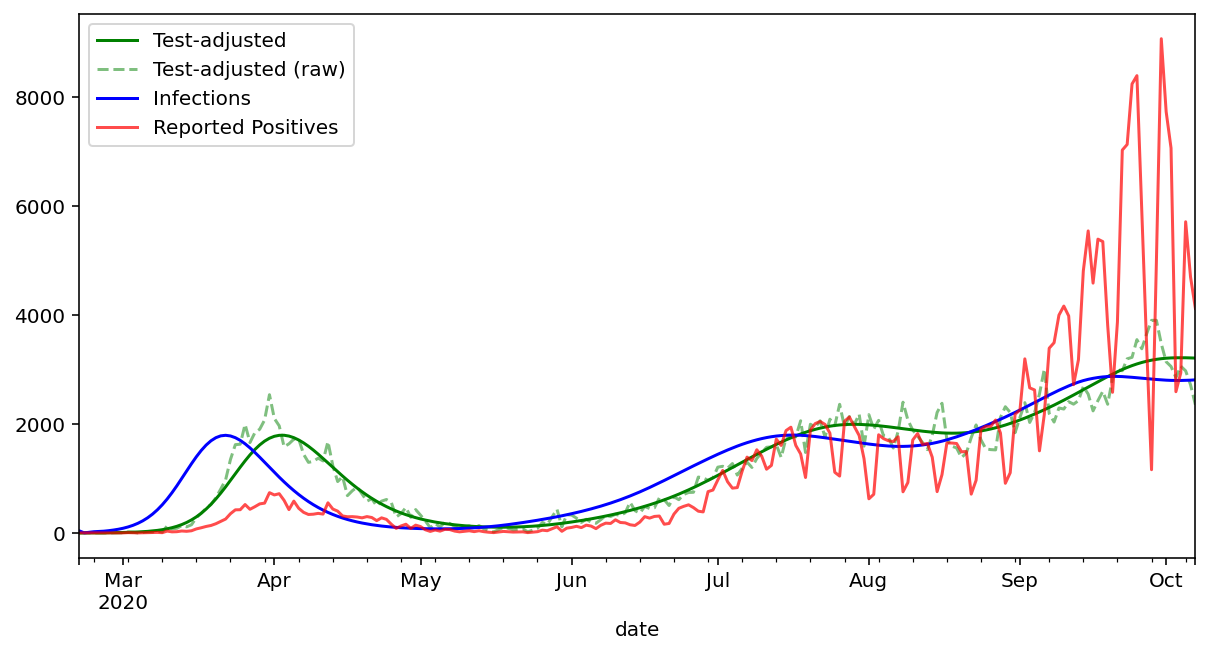

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

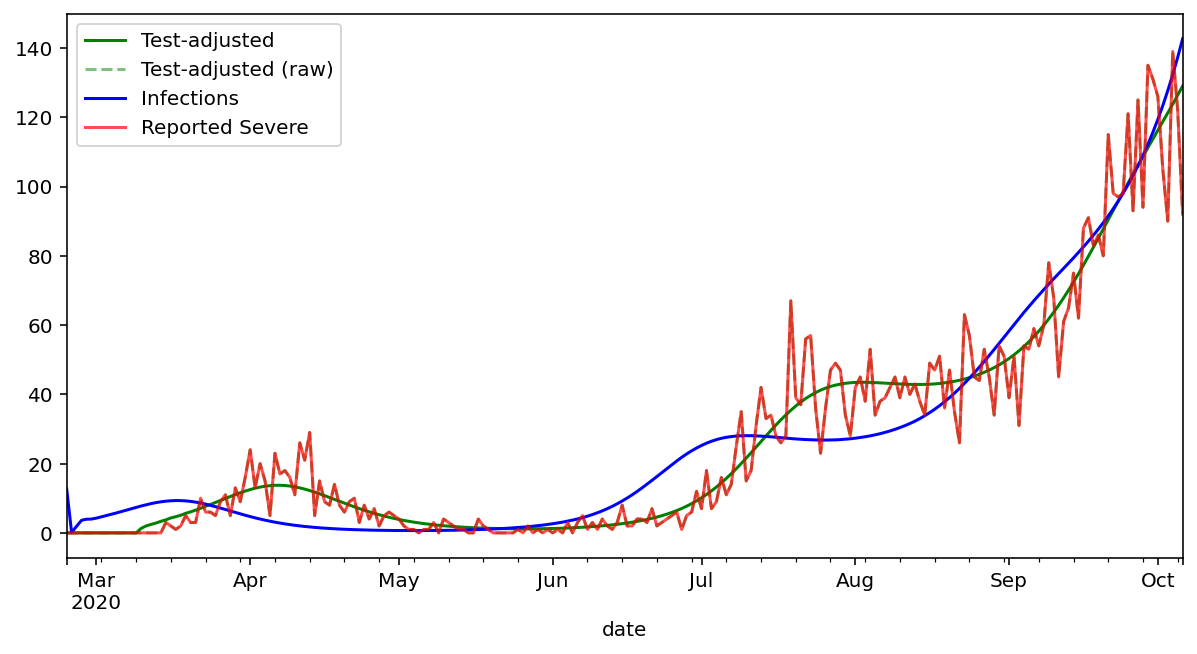

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

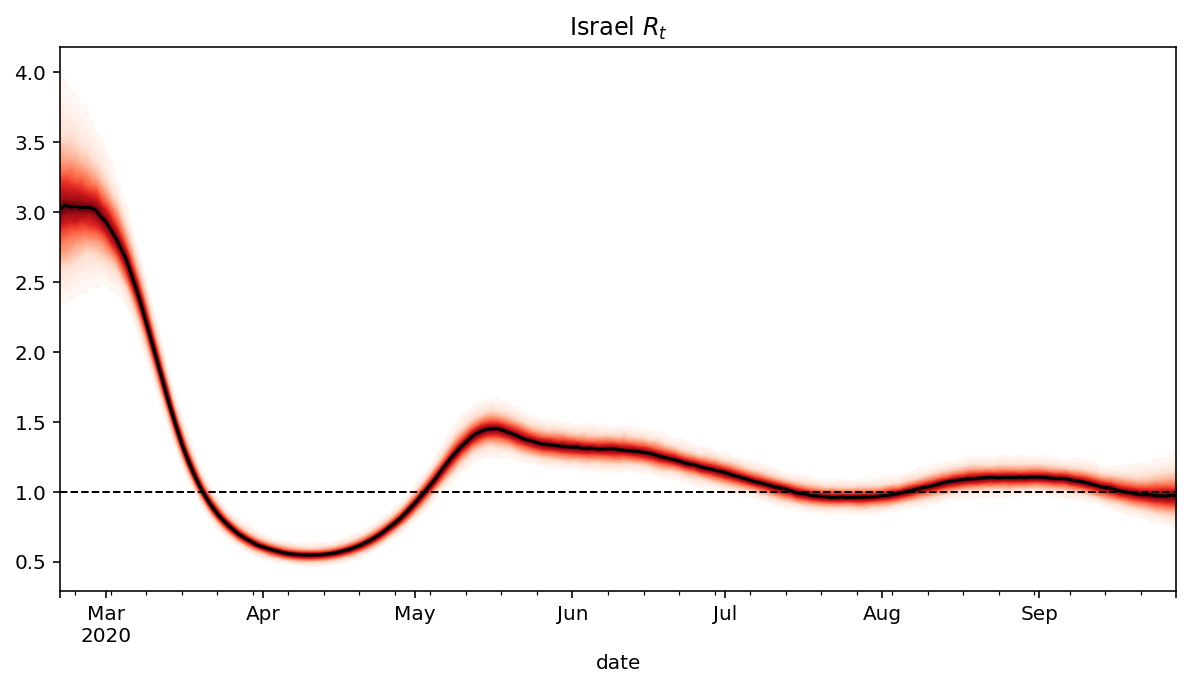

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')

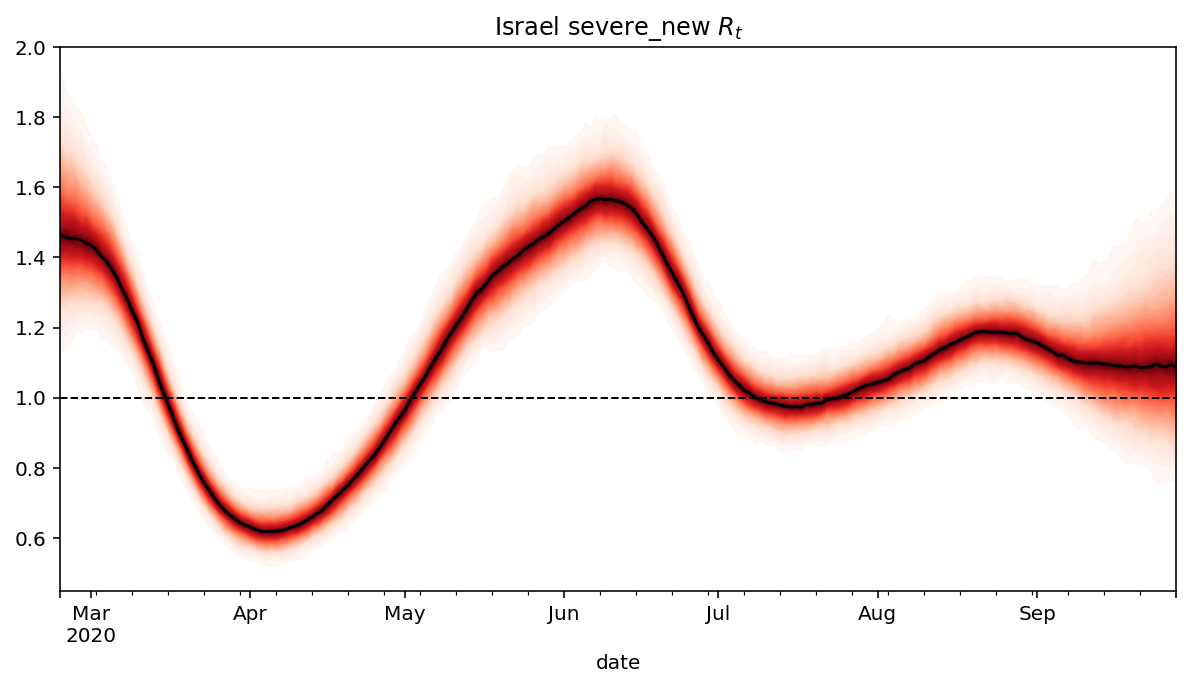

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')